<h3> Biological databases

<h4> Exercise1: Write a function that takes PDB ID as argument and saves into the file all lines which start with "ATOM" and "HETATM".What is the number of CA atoms in "1X1R"?

In [5]:
from urllib.request import urlopen #module for URL processing

def downloadPDB(pdbId):
    PDB_URL = f'http://www.rcsb.org/pdb/files/{pdbId}.pdb'   
    response = urlopen(PDB_URL)            #open URL 
    data = response.read().decode('utf-8') #read the content and use utf-8 encoding
    return data.split("\n")

def Save_into_file(pdbId):
    t = downloadPDB(pdbId)
    my_file = open("file1.txt", "w")
    for elem in t:
        if elem.startswith("ATOM") or elem.startswith("HETATM"): 
            my_file.write(elem)
            my_file.write("\n")
    my_file.close()
    
    count = 0

    for elem in t:
        if elem.startswith("ATOM"): 
            if 'CA' in elem:
                count += 1

    print('Number of CA atoms: ',count)

Save_into_file("1X1R")


Number of CA atoms:  169


<h4> Exercise2: For a given paper (chosen by yourself) save its abstract into a file (from PubMed database).

In [6]:
from urllib.request import urlopen
from lxml import etree #external library for XML files processing

PMID = '19114008'

baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
query = f"db=pubmed&id={PMID}&format=xml"    
url = baseurl+query #concatenation of efetch and our query


f = urlopen(url) #open url
resultxml = f.read() #read the content

xml = etree.XML(resultxml) 

resultelements= xml.xpath("//AbstractText") 

f = open("Abstract.txt", "w")
for element in resultelements:
    abstract = ''.join([element.text])
    print(abstract)
    f.write(abstract)
         
f.close()

Correlation networks are increasingly being used in bioinformatics applications. For example, weighted gene co-expression network analysis is a systems biology method for describing the correlation patterns among genes across microarray samples. Weighted correlation network analysis (WGCNA) can be used for finding clusters (modules) of highly correlated genes, for summarizing such clusters using the module eigengene or an intramodular hub gene, for relating modules to one another and to external sample traits (using eigengene network methodology), and for calculating module membership measures. Correlation networks facilitate network based gene screening methods that can be used to identify candidate biomarkers or therapeutic targets. These methods have been successfully applied in various biological contexts, e.g. cancer, mouse genetics, yeast genetics, and analysis of brain imaging data. While parts of the correlation network methodology have been described in separate publications, 

<h4> Exercise3: Find an appropriate tag and download a definition for NM_204410.1 (from  NCBI/nucleotide).

In [7]:
from urllib.request import urlopen
from lxml import etree

ID = 'NM_204410.1'
baseurl= "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
query= f"db=nucleotide&id={ID}&format=xml"
url= baseurl+query

f = urlopen(url) 
resultxml= f.read() 
xml= etree.XML(resultxml) 

resultelements = xml.xpath("//GBSeq_definition") 

for element in resultelements:
    print([element.text])

['Gallus gallus secreted protein acidic and cysteine rich (SPARC), mRNA']


<h4> Exercise4: Download the record KU325498.1 (from  NCBI/nucleotide) and save it into the file using FASTA format (where ID is a name).

In [8]:
ID = 'KU325498.1'
baseurl= "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
query= f"db=nucleotide&id={ID}&format=xml"
url= baseurl+query

f = urlopen(url) 
resultxml= f.read() 
xml= etree.XML(resultxml) 


In [9]:
resultelements = xml.xpath("//GBSeq_sequence") 

f = open("record.txt", "w")
for element in resultelements:
    f.write(f">{ID}\n{element.text}")
f.close()

<h4> Exercise5: Download SMILES format and plot "chlordiazepoxide" structure. What is the application of such a molecule?
 

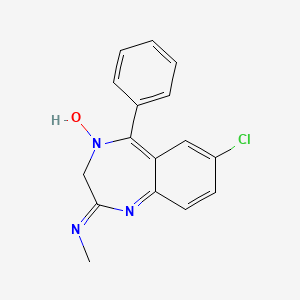

In [10]:
from urllib.request import urlretrieve
from IPython.display import Image

molecule = "chlordiazepoxide"
query = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{molecule}/XML"

response = urlopen(query)
resultxml = response.read()
tree = etree.XML(resultxml)

sek = []
for element in tree.iter():
    if element.tag == "{http://www.ncbi.nlm.nih.gov}PC-InfoData_value_sval": #there is a SMILES format
        sek.append(element.text)

smiles = sek[-2] #aspirin molecule in SMILES format
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

$\to$ Chlordiazepoxide is indicated for the short-term (2–4 weeks) treatment of anxiety that is severe and disabling or subjecting the person to unacceptable distress. It is also indicated as a treatment for the management of acute alcohol withdrawal syndrome.

<h4> Exercise6: Explain the following patterns and give example strings that match them:</h4>
    
        
    - AT*C:     ATC, ATAAC 
    - AT+C:     ATGC, ATAAC
    - AT?C:     ATC, ATAC
    - AT{3}C:   ATTTC
    - AT{2,8}C: ATTC, ATTTTTC
    - A.*C:     AC, ATGC, AAAAAC
    - A.+C:     ATC, ATATC
    - A.?C:     AC, AGC
    - A.{3}C:   ACCCC, ATCTC
    - A.{2,8}C: ATTC, ATGTAAC
    - A[GC]T:   AGT, ACT
    - A[^G]T:   ACT, ATT, AAT
    - ^A[GC]T$: AGT, ACT
    - ^A[^\s]+: ATGCA, AA

<h4> Exercise7: Write a regular expression that encompasses the following words:</h4>
        <br>
        
    - ATA, AGA, ACA:           A.A
    - AT, ACT, ACCT, ACCCCT:   A[CT]+
    - TAC, TCC, TCAAC, TCAACC: T[AC]{2,5}

<h4> Exercise8: Using regex find all non-overlapping subsequences composed of only C residues. For example, after application to ACTCCGCCCC you should obtain ['C','CC','CCC'].

In [11]:
import regex as re #library for regular expressions

seq = "ACTCCGCCCC"
pattern = 'C+'
print(re.findall(pattern, seq)) #findall has two arguments --> pattern and text

['C', 'CC', 'CCCC']


<h4> Exercise9: Using regex, remove all low characters from a sequence. For example, after application to ATTAAAaaaGccT you should obtain ATTAAAT. 

In [12]:
seq = "ATTAAAaaaGccT"
pattern = '[^[A-Z]]*'
print(re.sub(pattern, '', seq)) #sub has three arugments: pattern, to what we change the pattern, and text

ATTAAAGT


<h4> Exercise10: Consider the motif| A or G | ? | ? | ? | ? | G | K | S or T |.  
    
- Write a regular expression for the motif. $\to$ [AG].{4}GKS[ST]
- Download sequences AAH10041.2 and CAG38727.1 (from NCBI/proteins, automatically).
- What are the names of these proteins? 
- Localize the motif fragments within these proteins (positions).
- Compare the results with UNIPROT database data (Features).

In [56]:
# Download sequences AAH10041.2 and CAG38727.1 (from NCBI/proteins, automatically).

ID1 = 'AAH10041.2'
ID2 = 'CAG38727.1'

def download(ID, name):
    
    baseurl= "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
    query= f"db=Protein&id={ID}&format=xml"
    url= baseurl+query

    f = urlopen(url) 
    resultxml= f.read() 
    xml= etree.XML(resultxml) 
        
    resultelements = xml.xpath("//GBSeq_sequence") 

    f = open(name, "w")
    for element in resultelements:
        f.write(f">{ID}\n{element.text}")
    f.close()
    
    for element in resultelements:
        return(element.text)
    
seq1 = download(ID1, 'ID1_seq')

seq2 = download(ID2, 'ID2_seq')

In [37]:
tags = list({elem.tag for elem in xml.iter()})
print(tags)

['GBReference_authors', 'GBSeq_moltype', 'GBInterval_accession', 'GBSeq_organism', 'GBXref', 'GBXref_dbname', 'GBReference', 'GBSeq_update-date', 'GBAuthor', 'GBSeq_length', 'GBXref_id', 'GBFeature_key', 'GBQualifier', 'GBSeq_comment', 'GBInterval_from', 'GBSeq_definition', 'GBFeature_location', 'GBQualifier_value', 'GBQualifier_name', 'GBSeq_feature-table', 'GBSeq_taxonomy', 'GBSet', 'GBSeq_other-seqids', 'GBReference_consortium', 'GBReference_title', 'GBFeature_quals', 'GBReference_journal', 'GBSeq_topology', 'GBReference_position', 'GBReference_remark', 'GBFeature_intervals', 'GBSeq_accession-version', 'GBInterval_to', 'GBSeq_locus', 'GBKeyword', 'GBReference_pubmed', 'GBFeature', 'GBSeq_keywords', 'GBReference_xref', 'GBInterval', 'GBSeq_references', 'GBSeq_sequence', 'GBSeq_create-date', 'GBSeq_source-db', 'GBReference_reference', 'GBSeq_source', 'GBSeqid', 'GBSeq_primary-accession', 'GBSeq_division', 'GBSeq']


In [43]:
# What are the names of these proteins? 

def give_names(ID):
    
    baseurl= "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
    query= f"db=Protein&id={ID}&format=xml"
    url= baseurl+query

    f = urlopen(url) 
    resultxml= f.read() 
    xml= etree.XML(resultxml)
    
    resultelements= xml.xpath("//GBSeq_definition") 

    for element in resultelements:
        print([element.text])
        
give_names(ID1)
give_names(ID2)

['Tu translation elongation factor, mitochondrial [Homo sapiens]']
['RAB1A [Homo sapiens]']


In [57]:
# Localize the motif fragments within these proteins (positions).

f = open("ID1_seq")
t = f.read()
f.close()

seqs = re.findall("[ag].{4}gk[st]", t) 
print(seqs)

['ghvdhgkt']


In [64]:
from Bio.Seq import Seq
                  
fragment = "ghvdhgkt"
position = seq1.find(fragment)

print("Pozycja fragmentu {} w sekwencji to {}".format(fragment, position))


Pozycja fragmentu ghvdhgkt w sekwencji to 66


In [52]:
f = open("ID2_seq")
t = f.read()
f.close()

seqs = re.findall("[ag].{4}gk[st]", t) 
print(seqs)

['gdsgvgks']


In [65]:
fragment = "gdsgvgks"
position = seq2.find(fragment)

print("Pozycja fragmentu {} w sekwencji to {}".format(fragment, position))


Pozycja fragmentu gdsgvgks w sekwencji to 17


- Compare the results with UNIPROT database data (Features).

$\to$ after checking both records in the UNIPROT database, the results obtained in the previous part of the task were confirmed